# A Convolutional Neural Network Image Classifier

The convolutional neural network model helps classify images into different classes. For this specific project, the model helped classify images into six main classes. These include forests, glaciers, streets, mountains, buildings, and the sea. Thus, the model was fed with a variety of scenery images which it was supposed to predict their specific classes. To develop the model, several key aspects and features were utilized such as TensorFlow and Open-Source Computer Vision library (Open-CV) to process the data.

In [5]:
#imports
import numpy as np
import tensorflow as tf
import cv2
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random


In [1]:
# Loading data paths
train_dir = r'D:\Python\Datafolder\images\seg_train'
test_dir = r'D:\Python\Datafolder\images\seg_test'
pred_dir = r'D:\Python\Datafolder\images\seg_pred'

In [2]:
#Creating items name and labels
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 
nb_classes = len (class_names)
print (class_names_label)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [3]:
# A function that terates through the data loads it
def load_data():
    DIRECTORY = r'D:\Python\Datafolder\images'
    CATEGORY = ['seg_train', 'seg_test' ]
    
    output = []
    for category in CATEGORY:
        path  = os.path.join(DIRECTORY, category)
        print(path)
        images = []
        labels = []
        
        print ('Loading {}'.format(category))
        
        for folder in os.listdir(path):
            label = class_names_label[folder]
            for file in os.listdir(os.path.join(path, folder)):
                img_path = os.path.join(os.path.join(path, folder), file)
                #resizing the images
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (100, 100))

                #appending images and labels
                images.append(image)
                labels.append(label)
        images = np.array(images, dtype = 'float32')
        labels = np.array( labels, dtype = 'int32')
        
        output.append((images, labels))
    
    return output


In [6]:
# Loading the data
(train_images, train_labels), (test_images, test_labels) = load_data()

D:\Python\Datafolder\images\seg_train
Loading seg_train
D:\Python\Datafolder\images\seg_test
Loading seg_test


In [7]:
# Shuffling the data
train_images, train_labels = shuffle(train_images, train_labels)

## Visualizing the data

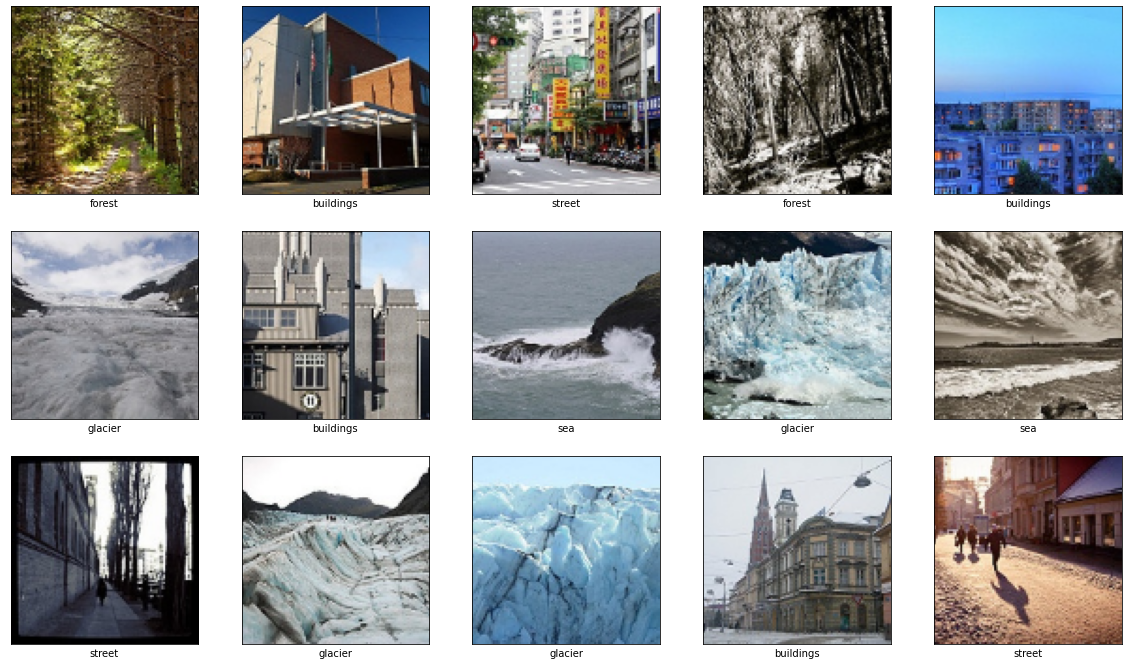

In [9]:
def display_examples (class_names, images, labels):
    
    figsize = (20, 20)
    fig = plt.figure(figsize=figsize)
    for i in range (15):
        plt.subplot(5,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        #image = cv2.resize(images[i], figsize)
        plt.imshow(images[i].astype(np.uint8))
        plt.xlabel(class_names[labels[i]])
    plt.show()
display_examples (class_names, train_images, train_labels)

### Data Augmentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Train and test data generator
train_datagen = ImageDataGenerator( rescale = 1.0/255, rotation_range=20 , zoom_range=0.2, 
                                   horizontal_flip=True, brightness_range=[0.6,0.9], fill_mode='nearest')
test_datagen = ImageDataGenerator( rescale = 1.0/255)

In [15]:
# Creating training batches
print ('Total images and classes')
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=128, class_mode='categorical',target_size=(150, 150))     
# Creating validation images
validation_generator =  test_datagen.flow_from_directory(test_dir, batch_size=128, shuffle=False, class_mode  = 'categorical', 
                                                         target_size = (150, 150))


Total images and classes
Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


### Creating the Model

In [16]:
# Creating the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [17]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Compiling the Model

In [18]:
# Using Adam optimizer
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

### Fitting the Model

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='loss', patience=5)
epoch = 20 
history = model.fit(train_generator, epochs = epoch, validation_data = validation_generator, verbose = 1,steps_per_epoch = 110)

2022-05-05 12:05:11.986651: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-05-05 12:05:14.633893: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


110/110 [==============================] - 171s 1s/step - loss: 1.1645 - accuracy: 0.5536 - val_loss: 0.9014 - val_accuracy: 0.6850
Epoch 2/20
110/110 [==============================] - 102s 927ms/step - loss: 0.8113 - accuracy: 0.6986 - val_loss: 0.6991 - val_accuracy: 0.7413
Epoch 3/20
110/110 [==============================] - 103s 940ms/step - loss: 0.6741 - accuracy: 0.7526 - val_loss: 0.7253 - val_accuracy: 0.7457
Epoch 4/20
110/110 [==============================] - 104s 950ms/step - loss: 0.6089 - accuracy: 0.7822 - val_loss: 0.6634 - val_accuracy: 0.7723
Epoch 5/20
110/110 [==============================] - 103s 933ms/step - loss: 0.5464 - accuracy: 0.8028 - val_loss: 0.5385 - val_accuracy: 0.8220
Epoch 6/20
110/110 [==============================] - 103s 934ms/step - loss: 0.5187 - accuracy: 0.8122 - val_loss: 0.6234 - val_accuracy: 0.7893
Epoch 7/20
110/110 [==============================] - 104s 943ms/step - loss: 0.4770 - accuracy: 0.8302 - val_loss: 0.6087 - val_accuracy:

### Evaluating the model using confusion matrix and classification report

24/24 [==============================] - 6s 241ms/step - loss: 0.5041 - accuracy: 0.8503
Confusion Matrix
[[370   3   3   4   8  49]
 [  3 463   1   3   2   2]
 [  5   5 453  58  28   4]
 [  6   9  70 398  40   2]
 [ 11   4  36  18 435   6]
 [ 47  14   1   4   3 432]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.84      0.85      0.84       437
      forest       0.93      0.98      0.95       474
     glacier       0.80      0.82      0.81       553
    mountain       0.82      0.76      0.79       525
         sea       0.84      0.85      0.85       510
      street       0.87      0.86      0.87       501

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



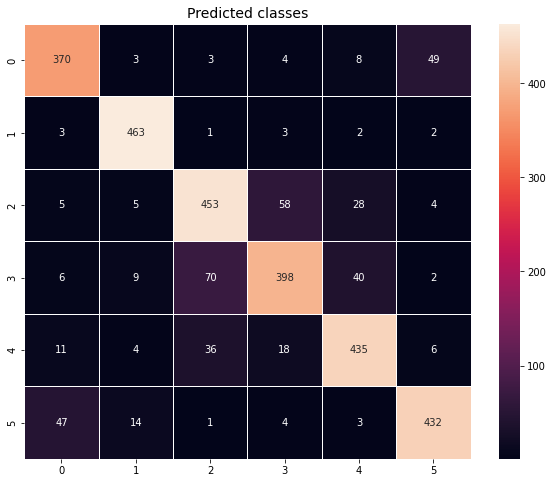

In [17]:
 Y_pred = model.predict(validation_generator)
model.evaluate(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['buildings','forest','glacier','mountain','sea','street']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
plt.figure(figsize=(10,8))
plt.title('Predicted classes', size=14)
sns.heatmap(confusion_matrix(validation_generator.classes, y_pred), annot=True, fmt = '.0f',linewidths=.5)
plt.show()

### Transfer Learning Model

In [18]:
# Creating another model for comparison

model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.2))

model2.add(tf.keras.layers.Dense(6, activation='softmax'))



In [ ]:
# Model compiling
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])

In [19]:
# Fitting the model
history2 = model2.fit(train_generator, epochs = epoch, 
                      validation_data = validation_generator, verbose = 1,steps_per_epoch = 110)

Epoch 1/20
110/110 [==============================] - 107s 966ms/step - loss: 2.5823 - accuracy: 0.5078 - val_loss: 8.5614 - val_accuracy: 0.2120
Epoch 2/20
110/110 [==============================] - 104s 948ms/step - loss: 0.9493 - accuracy: 0.6446 - val_loss: 3.4560 - val_accuracy: 0.1760
Epoch 3/20
110/110 [==============================] - 104s 947ms/step - loss: 0.8102 - accuracy: 0.7007 - val_loss: 2.7945 - val_accuracy: 0.3033
Epoch 4/20
110/110 [==============================] - 106s 967ms/step - loss: 0.7192 - accuracy: 0.7372 - val_loss: 2.0698 - val_accuracy: 0.4453
Epoch 5/20
110/110 [==============================] - 106s 960ms/step - loss: 0.6716 - accuracy: 0.7574 - val_loss: 0.8022 - val_accuracy: 0.7117
Epoch 6/20
110/110 [==============================] - 105s 960ms/step - loss: 0.6182 - accuracy: 0.7793 - val_loss: 0.6526 - val_accuracy: 0.7717
Epoch 7/20
110/110 [==============================] - 108s 987ms/step - loss: 0.5730 - accuracy: 0.7944 - val_loss: 1.4042 -

### Creating a confusion matrix and Classification Report

In [21]:
#Confution Matrix and Classification Report
Y_pred2 = model.predict(validation_generator)
model2.evaluate(validation_generator)

y_pred2 = np.argmax(Y_pred2, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred2))
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred2, target_names=target_names))

24/24 [==============================] - 6s 238ms/step - loss: 0.6730 - accuracy: 0.7987
Confusion Matrix
[[370   3   3   4   8  49]
 [  3 463   1   3   2   2]
 [  5   5 453  58  28   4]
 [  6   9  70 398  40   2]
 [ 11   4  36  18 435   6]
 [ 47  14   1   4   3 432]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.84      0.85      0.84       437
      forest       0.93      0.98      0.95       474
     glacier       0.80      0.82      0.81       553
    mountain       0.82      0.76      0.79       525
         sea       0.84      0.85      0.85       510
      street       0.87      0.86      0.87       501

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



### The End